# Klasyfikacja Ruchu

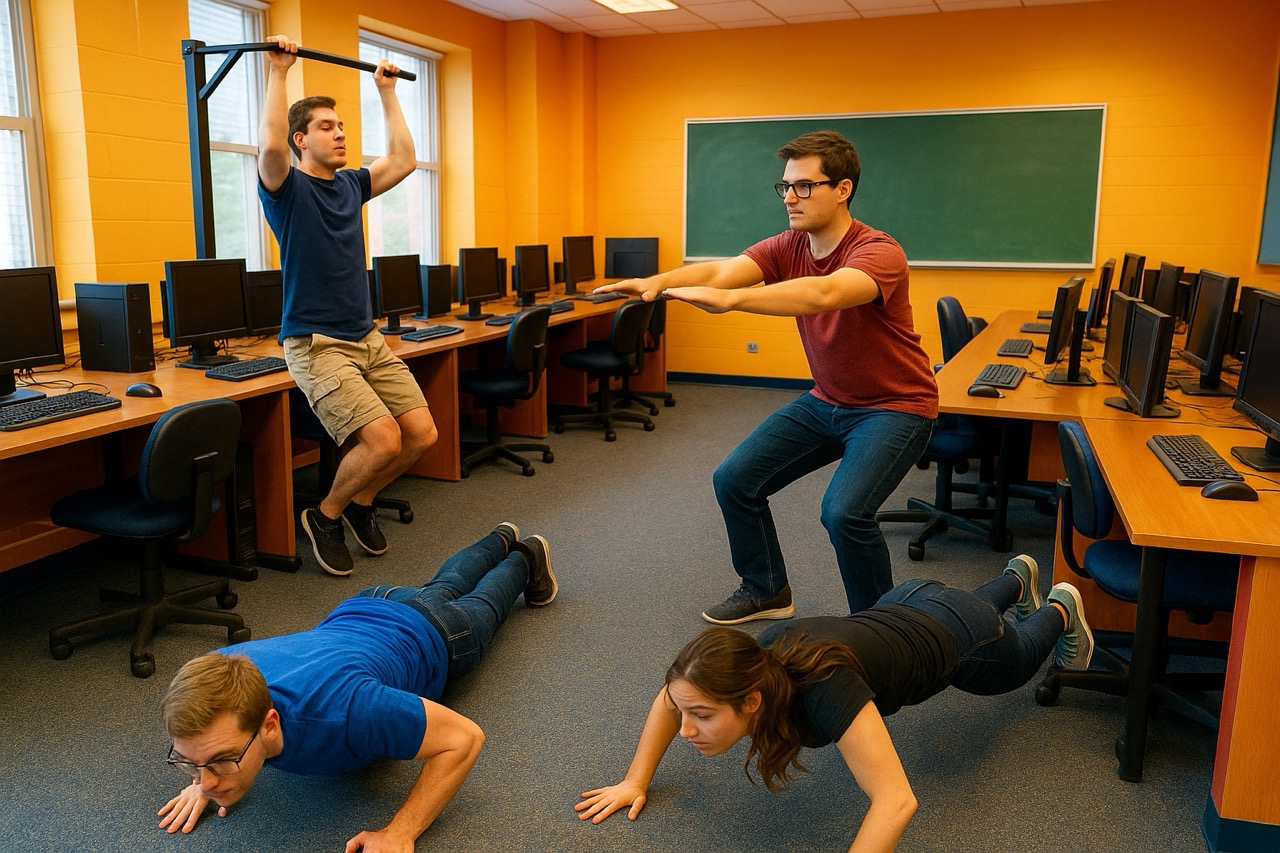

*Obraz wygenerowany za pomocą ChatGPT.*

## Wstęp
**Ruch to zdrowie!** Wyobraź sobie, że jesteś specjalistą ds. uczenia maszynowego w firmie rozwijającej aplikacje zdrowotne. Pracujesz nad innowacyjną aplikacją dla nowoczesnego biura — miejsca, w którym nie tylko siedzi się przy komputerze, ale dba się też o zdrowie pracowników. Co godzinę komputer przypomina: „Czas na ruch!" Pracownicy wstają od biurek i wykonują krótkie ćwiczenia — przysiady, rozciąganie, skłony, a Twoja aplikacja śledzi, czy ćwiczenia są wykonywane poprawnie, pomagając zapobiegać kontuzjom i wspierając zdrowy tryb życia.

To nie tylko technologia — to misja. Badania pokazują, że nawet 5 minut ruchu co godzinę może znacząco poprawić koncentrację, samopoczucie i zdrowie kręgosłupa. Jednak ważne jest, aby ruch był wykonywany prawidłowo. Niewłaściwie wykonane przysiady czy skłony mogą przynieść więcej szkody niż pożytku, prowadząc do kontuzji i zniechęcenia do aktywności fizycznej.

Jako ekspert ds. analizy danych i uczenia maszynowego, zostałeś poproszony o stworzenie algorytmu, który precyzyjnie rozpozna typy wykonywanych ruchów przy jednoczesnej optymalizacji wykorzystania zasobów obliczeniowych.

## Zadanie
Twoim zadaniem jest opracowanie systemu klasyfikującego rodzaj ruchu wykonywanego przez osobę na podstawie pojedynczej klatki (czyli jednego momentu w czasie), zawierającej współrzędne (x, y, z) 25 kluczowych punktów na ciele (w trójwymiarowej przestrzeni), takich jak: dłonie, łokcie, kolana czy stopy.

Ponadto, aby zapewnić wydajność aplikacji na różnych urządzeniach, w tym tych o ograniczonych zasobach, kluczowym aspektem zadania jest zredukowanie wymiarowości danych wejściowych przy zachowaniu jak najwyższej dokładności klasyfikacji.

W trakcie pracy nad rozwiązaniem będziesz mógł ocenić jego efektywność na zbiorze walidacyjnym, który pozwoli Ci sprawdzić zarówno dokładność klasyfikacji, jak i skuteczność redukcji wymiarowości.

### Dane
Dostępne dla Ciebie w tym zadaniu dane to:

- **Zbiór danych treningowych** zawierający współrzędne punktów ciała oraz odpowiadające im etykiety aktywności;
- **Zbiór danych walidacyjnych** do oceny jakości Twojego modelu.

Dane wejściowe to zestaw współrzędnych punktów przedstawiających pozycję ciała człowieka w przestrzeni 3D o rozmiarze `(n_samples, 75)`, gdzie `n_samples` to liczba próbek w zbiorze, a 75 cech odpowiada 25 trójwymiarowym punktom kluczowym na ciele, spłaszczonym do wektora. Na ich podstawie musisz wytrenować model, który przypisze jedną z 46 etykiet określających typ ruchu, np. „skakanie”, „bieganie”, „przysiady”. W praktyce będziesz pracować z etykietami o wartościach z `{1, ..., 46}` o rozmiarze `(n_samples,)`.

Twoje rozwiązanie zostanie ostatecznie przetestowane na Platformie Konkursowej na ukrytym zestawie danych testowych, który nie różni się znacząco od zbioru walidacyjnego pod względem rozkładu danych i reprezentowanych klas.

### Kryterium Oceny
Jak możesz się spodziewać, w ewaluacji będziemy oceniać dwa kluczowe aspekty Twojego rozwiązania:

- **Dokładność Klasyfikacji** - jak dobrze Twój model rozpoznaje różne rodzaje aktywności fizycznej;
- **Skuteczność Redukcji Wymiarowości** - jak znacząco udało Ci się zmniejszyć wymiar danych przy zachowaniu dobrej jakości klasyfikacji.

Finalny wynik definiujemy jako średnią ważoną tych dwóch aspektów:

$$ score = \frac{1}{2} \cdot accuracy \cdot 100 + \frac{1}{2} \cdot \frac{(75 - d_{reduced})}{74} \cdot 100 $$

gdzie $accuracy$ to dokładność klasyfikatora (wartość od 0 do 1), a $d_{reduced}$ - wymiar danych po redukcji wymiaru. Ponieważ zależy nam na odpowiednio wysokiej jakości rozwiązania, ustaliliśmy progi punktowe, które muszą zostać przekroczone, aby otrzymać punkty za to zadanie:

$$ points = \begin{cases}
0 & \text{jeżeli } score < 30 \\
\frac{score - 30}{79 - 30} \cdot 100 & \text{jeżeli } 30 \leq score \leq 79 \\
100 & \text{jeżeli } score > 79
\end{cases} $$

Ta formuła wyraża, że aby uzyskać punkty, Twoje rozwiązanie musi osiągnąć minimalny wynik 30, a maksymalna liczba punktów ($100$) jest przyznawana za rozwiązania o wyniku powyżej 79.

Szczegóły implementacji tej formuły znajdziesz w funkcji `grade` w kodzie zadania.

## Ograniczenia

* Twoje rozwiazanie będzie testowane na Platformie Konkursowej bez dostępu do internetu.
* Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej **nie** może trwać dłużej niż 3 minuty na CPU.
* Twoje rozwiązanie może korzystać tylko z metod dostępnych w `sklearn` oraz `numpy`, a więc bez użycia GPU.
* Model **nie** może korzystać z innych zbiorów danych oraz z pre-trenowanych wag na innych zbiorach danych.
* Model musi zwracać wyniki w formacie, który jest kompatybilny z funkcją `sklearn.metrics.accuracy_score`.

## Pliki zgłoszeniowe

Ten notebook uzupełniony o Twoje rozwiązanie (patrz klasa `YourSolution`).

## Ewaluacja

Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.

# Kod Startowy
W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [1]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

# W czasie sprawdzania Twojego rozwiązania, wartość flagi FINAL_EVALUATION_MODE zostanie zmieniona na True
FINAL_EVALUATION_MODE = False

In [2]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

import os
import random

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from sklearn.metrics import accuracy_score


In [3]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

# Ustawienie ziarna generatora liczb pseudolosowych w celu zapewnienia deterministycznych wyników.
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Ładowanie Danych
Za pomocą poniższego kodu wczytujemy dane.

In [4]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

if not FINAL_EVALUATION_MODE:
    print("Rozmiar X_train:", X_train.shape)
    print("Rozmiar y_train:", y_train.shape)
    print("Rozmiar X_val:", X_val.shape)
    print("Rozmiar y_val:", y_val.shape)
    print("Liczba klas:", np.unique(y_train).shape[0])

Rozmiar X_train: (2944, 75)
Rozmiar y_train: (2944,)
Rozmiar X_val: (368, 75)
Rozmiar y_val: (368,)
Liczba klas: 46


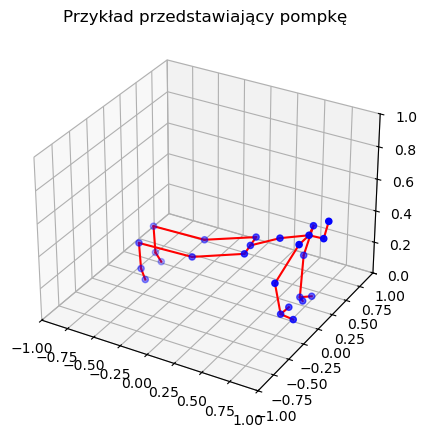

In [5]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    sample = X_train[12].reshape(25, 3)

    # Zdefiniowanie połączeń między punktami tworzącymi ciało
    connections = [
        (0, 7), (7, 8), # tułów
        (8, 9), (9, 10), # głowa
        (8, 11), (8, 14), (11, 12), (12, 13), (14, 15), (15, 16), # ramiona
        (16, 23), (16, 24), (13, 21), (13, 22), # dłonie
        (0, 1), (0, 4), (4, 5), (5, 6), (1, 2),(2, 3), # nogi
        (3, 17), (17, 18), (6, 19), (19, 20), # stopy
    ]

    # Tworzenie wykresu 3D
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Rysowanie punktów
    ax.scatter(sample[:, 0], sample[:, 1], sample[:, 2], c='blue', s=20)

    # Rysowanie linii
    for start, end in connections:
        ax.plot([sample[start, 0], sample[end, 0]], 
                [sample[start, 1], sample[end, 1]], 
                [sample[start, 2], sample[end, 2]], 'r-')

    # Ustawienie tytułu i zakresów osi
    plt.title("Przykład przedstawiający pompkę")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 1)

    plt.show()

## Kod z Kryterium Oceniającym
Kod, zbliżony do poniższego, będzie używany do oceny rozwiązania na zbiorze testowym.

In [6]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def grade(model, X_val, y_val) -> float:
    X_val_reduced = model.reduce(X_val)

    if X_val_reduced.shape[0] != y_val.shape[0]:
        raise ValueError("X i y mają różne długości")
    
    y_pred = model.predict(X_val_reduced)

    accuracy = accuracy_score(y_val, y_pred) * 100
    reduction_score = (75 - X_val_reduced.shape[1])

    final_score = 0.5 * accuracy + 0.5 * reduction_score * 100 / 74
    points = min(100, max(0, ((final_score - 30)/(79 - 30)) * 100))
    
    return int(round(points)), final_score, accuracy, reduction_score

## Przykładowe Rozwiązanie

Poniżej przedstawiamy uproszczone rozwiązanie, które służy jako przykład demonstrujący podstawową funkcjonalność notatnika.

In [7]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

class DummySolution:
    def train(self, X_train: NDArray, y_train: NDArray):
        pass

    def reduce(self, X: NDArray) -> NDArray:
        return X

    def predict(self, X: NDArray) -> NDArray[np.int_]:
        return np.ones(X.shape[0])

In [8]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    dummy_model = DummySolution()
    dummy_model.train(X_train, y_train)
    points, score, accuracy, reduction_score = grade(dummy_model, X_val, y_val)
    print(f"Przykładowe rozwiązanie uzyskało: {points} pkt. na zbiorze walidacyjnym!")
    print(f"Ważony score: {points}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Liczba zredukowanych cech: {int(reduction_score)}")

Przykładowe rozwiązanie uzyskało: 0 pkt. na zbiorze walidacyjnym!
Ważony score: 0
Accuracy: 2.45%
Liczba zredukowanych cech: 0


# Twoje Rozwiązanie
W tej sekcji należy umieścić Twoje rozwiązanie. Wprowadzaj zmiany wyłącznie tutaj!

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

class YourSolution:
    def __init__(self, seed = 25):
        self.rf = []
        self.seed = seed
        self.scaler = None
        
        self.points_to_leave = [3,6,0,8,16,13]

    def train(self, X, y):
        """Wytrenuj wszystkie komponenty modelu.

        **UWAGA**: Pamiętaj, aby ustawić RANDOM_SEED przed treningiem modelu!

        Wymiary danych wejściowych:
        - `X` - `(n, 75)`
        - `y` - `(n,)`
        """

        np.random.seed(self.seed)
        
        mask = np.zeros(25)
        mask[self.points_to_leave] = 1
        mask = mask.astype(bool)
        
        X = X.reshape(-1, 25, 3)
        X = X[:, mask, :]
        X = X.reshape(-1, 3 * len(self.points_to_leave))
        
        # Feature scaling
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)

        # Random Forest

        self.rf = RandomForestClassifier(n_estimators=200, random_state=self.seed)
        self.rf.fit(X, y)

    def reduce(self, X):
        """Metoda przetwarzająca dane do pośredniej reprezentacji.

        W tej metodzie wykonaj ewentualną redukcję wymiarowości / preprocessing danych wejściowych.

        **UWAGA**: Kod oceniający wykorzysta tę metodę do oceny stopnia redukcji wymiarowości
        oraz przetworzenia danych testowych przed przekazaniem ich do `predict()`!

        Wymiary danych wejściowych:
        - `X` - `(m, 75)`

        Oczekiwany wymiar danych wyjściowych: `(m, <wymiar po Twojej redukcji>)`
        """
        
        np.random.seed(self.seed)
        
        mask = np.zeros(25)
        mask[self.points_to_leave] = 1
        mask = mask.astype(bool)
        
        X = X.reshape(-1, 25, 3)
        X = X[:, mask, :]
        X = X.reshape(-1, 3 * len(self.points_to_leave))
        
        if self.scaler is not None:
            X = self.scaler.transform(X)
        
        return X

    def predict(self, X):
        """Wykonaj klasyfikację danych wejściowych.

        Wymiary danych wejściowych:
        - `X` - `(k, <wymiar po Twojej redukcji>)`

        Oczekiwany wymiar danych wyjściowych: `(k,)`
        """

        if self.rf is not None:
            return self.rf.predict(X)
        else:
            raise ValueError("No model has been trained yet. Call train() first.")

In [10]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

model = YourSolution()
model.train(X_train, y_train)

# Ewaluacja

Uruchomienie poniższej komórki pozwoli sprawdzić, ile punktów zdobyłoby Twoje rozwiązanie na danych walidacyjnych. Przed wysłaniem upewnij się, że cały notebook wykonuje się od początku do końca bez błędów i bez konieczności ingerencji użytkownika po wybraniu opcji "Run All".

In [11]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    points, score, accuracy, reduction_score = grade(model, X_val, y_val)
    print(f"Twoje rozwiązanie uzyskało: {points} pkt. na zbiorze walidacyjnym!")
    print(f"Ważony score: {score:.2f}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Liczba zredukowanych cech: {int(reduction_score)}")

Twoje rozwiązanie uzyskało: 100 pkt. na zbiorze walidacyjnym!
Ważony score: 79.27
Accuracy: 81.52%
Liczba zredukowanych cech: 57


Podczas sprawdzania model zostanie zapisany jako `your_model.pkl` i oceniony na zbiorze testowym.

In [12]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if FINAL_EVALUATION_MODE:      
    import cloudpickle
      
    OUTPUT_PATH = "file_output"
    FUNCTION_FILENAME = "your_model.pkl"
    FUNCTION_OUTPUT_PATH = os.path.join(OUTPUT_PATH, FUNCTION_FILENAME)

    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)

    with open(FUNCTION_OUTPUT_PATH, "wb") as f:
        cloudpickle.dump(model, f)